# LOAD SHAP & SETUP

In [6]:
import shap
import pandas as pd
import joblib
import matplotlib.pyplot as plt

model = joblib.load('churn_model_xgb.pkl')
X_test = pd.read_csv('processed_churn_data.csv').drop('Churn', axis=1).iloc[:100]

# XGBoost is a tree-based model, so we use TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
print("SHAP Values calculated successfully!")

SHAP Values calculated successfully!


# The Global View (Summary Plot)
# This chart shows what matters most to the company?

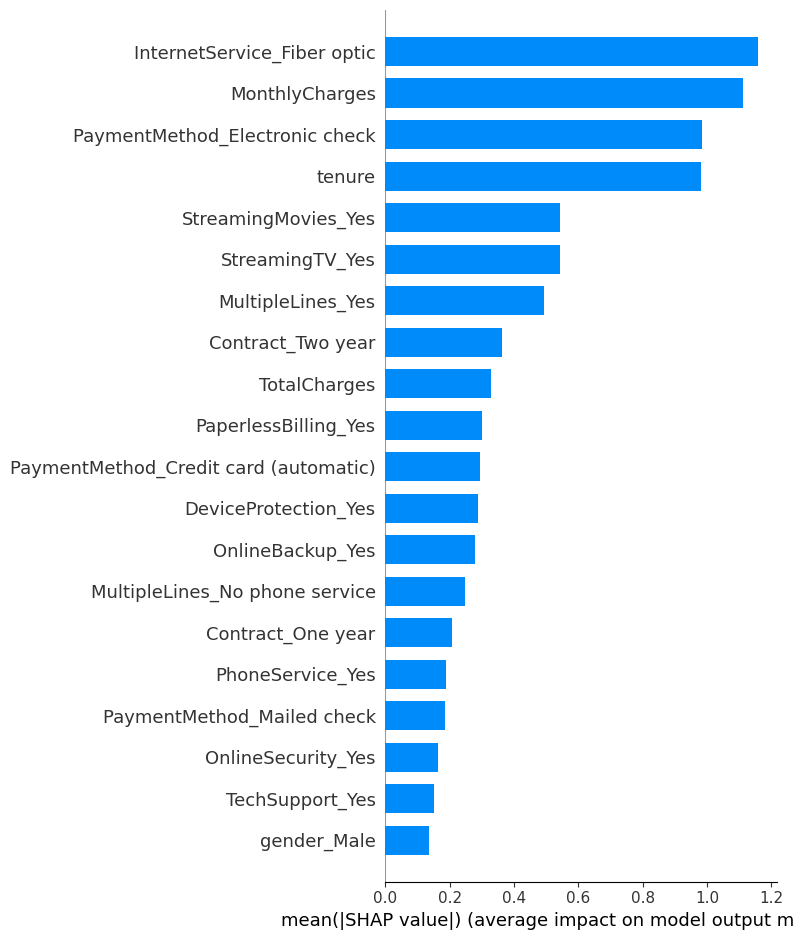

In [7]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")

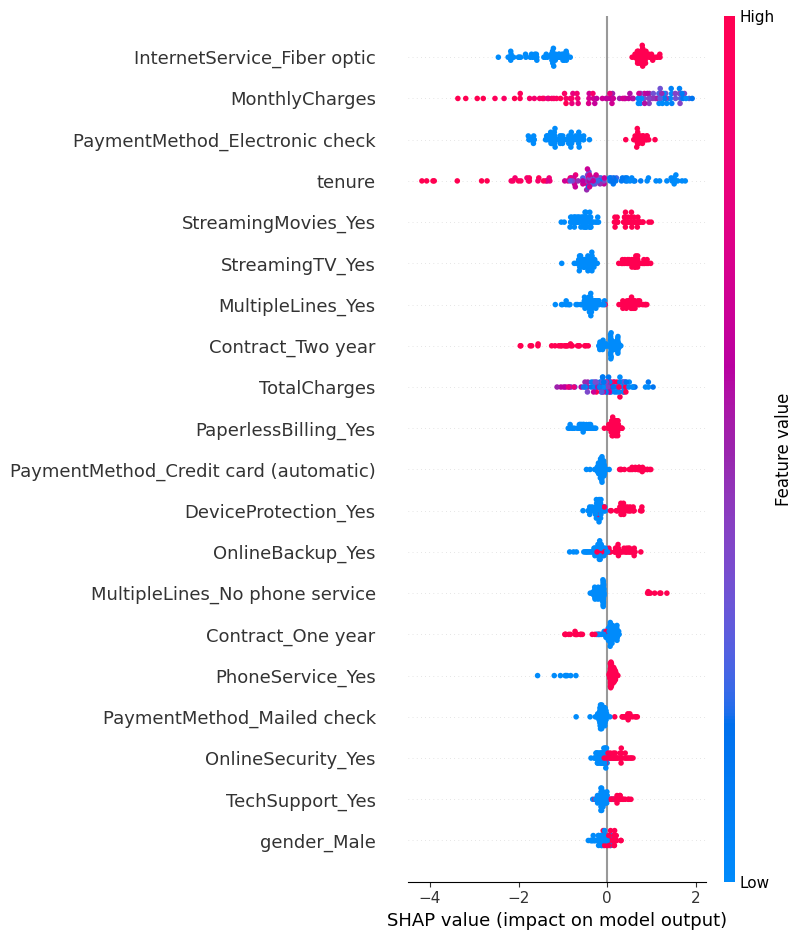

In [8]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)

# Preparing Data for Looker Studio

In [1]:
import pandas as pd
import joblib

df_original = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# We must repeat the cleaning step to ensure row counts match (7043 -> 7032)
df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')
df_original.dropna(inplace=True)

# Load the PROCESSED data (Machine Readable)
df_processed = pd.read_csv('processed_churn_data.csv')
X_input = df_processed.drop('Churn', axis=1)

try:
    xgb_model = joblib.load('churn_model_xgb.pkl')
    print("Model loaded successfully.")
except FileNotFoundError:
    print("Error: Model file not found.")

# Now X_input has 7032 rows, and df_original has 7032 rows. Perfect match!
y_probs = xgb_model.predict_proba(X_input)[:, 1]

# Attach Predictions
df_dashboard = df_original.copy()
df_dashboard['Churn_Probability'] = y_probs
df_dashboard['Risk_Category'] = df_dashboard['Churn_Probability'].apply(
    lambda x: 'High Risk' if x > 0.7 else ('Medium Risk' if x > 0.3 else 'Low Risk')
)

df_dashboard.to_csv('churn_dashboard_human_readable.csv', index=False)
print("SUCCESS: 'churn_dashboard_human_readable.csv' saved with 7032 rows!")

Model loaded successfully.
SUCCESS: 'churn_dashboard_human_readable.csv' saved with 7032 rows!
